In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from results import *
from matplotlib.pyplot import subplots

In [12]:
def rat(er, ei, gx, ex, mx, mv):
    qeff = ei * 54 * 0.303 / (2 * 120 * er + mv ** 2)
    deno = 2 * sqrt(2) * gf * (2 * 120 * er + mv ** 2)
    u = -0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3) * ei ** 2
    d = -0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3) * ei ** 2
    qbsmsm = 54 * (0.5 - 2 * ssw + 2 * u / deno + d / deno) + 76 * (-0.5 + u / deno + 2 * d / deno)
    qsm = 54 * (0.5 - 2 * ssw) + 76 * (-0.5)
    return (qeff ** 2) * (gx ** 2) / 4 * (ex ** 2) / (ex ** 2 - mx ** 2) / ((gf ** 2) * (qbsmsm ** 2 - qsm ** 2)) * 4 * ei ** 2 * (1 - mv ** 2 / 0.134 ** 2) ** 3 / (0.331 * (1 + erf(0.248 * (er * 1e6 - 9.22))))

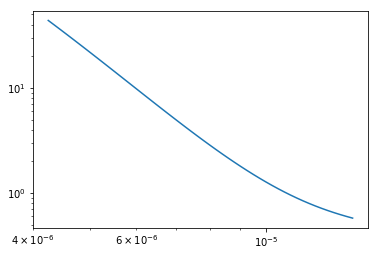

In [14]:
el = logspace(log10(4.25e-6), log10(2 * ((2.9e-2 ** 2) - 1e-8) / 120))
r = zeros_like(el)
for i in range(50):
    r[i] = rat(el[i], 1e-4, 1, 2.9e-2, 1e-4, 1e-3)
fig, ax = subplots()
ax.plot(el, r)
ax.set_xscale('log')
ax.set_yscale('log')

In [29]:
def rat2(er, ei, gx, ex, mx, mv):
    qeff = ei * 54 * 0.303 / (2 * 120 * er + mv ** 2)
    deno = 2 * sqrt(2) * gf * (2 * 120 * er + mv ** 2)
    u = -0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3) * ei ** 2
    d = -0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3) * ei ** 2
    qbsmsm = 54 * (0.5 - 2 * ssw + 2 * u / deno + d / deno) + 76 * (-0.5 + u / deno + 2 * d / deno)
    qsm = 54 * (0.5 - 2 * ssw) + 76 * (-0.5)
    # print(qsm, qbsmsm)
    return (qeff ** 2) * (gx ** 2) / 4 * (ex ** 2) / (ex ** 2 - mx ** 2) / ((gf ** 2) * (qbsmsm ** 2 - qsm ** 2)) * 4 * ei ** 2 * (1 - mv ** 2 / 0.134 ** 2) ** 3

-35.9696 -36.7485997327
-35.9696 -36.7131737624
-35.9696 -36.6793573926
-35.9696 -36.647077618
-35.9696 -36.6162647332
-35.9696 -36.5868521846
-35.9696 -36.5587764287
-35.9696 -36.5319767967
-35.9696 -36.5063953655
-35.9696 -36.4819768338
-35.9696 -36.4586684045
-35.9696 -36.4364196715
-35.9696 -36.4151825119
-35.9696 -36.3949109836
-35.9696 -36.3755612261
-35.9696 -36.3570913674
-35.9696 -36.3394614336
-35.9696 -36.3226332636
-35.9696 -36.3065704269
-35.9696 -36.2912381456
-35.9696 -36.2766032194
-35.9696 -36.2626339547
-35.9696 -36.2493000961
-35.9696 -36.2365727613
-35.9696 -36.2244243792
-35.9696 -36.2128286305
-35.9696 -36.2017603906
-35.9696 -36.1911956762
-35.9696 -36.1811115928
-35.9696 -36.1714862861
-35.9696 -36.1622988943
-35.9696 -36.1535295033
-35.9696 -36.1451591039
-35.9696 -36.1371695506
-35.9696 -36.1295435223
-35.9696 -36.122264485
-35.9696 -36.1153166564
-35.9696 -36.1086849713
-35.9696 -36.1023550492
-35.9696 -36.0963131635
-35.9696 -36.0905462114
-35.9696 -36.08504

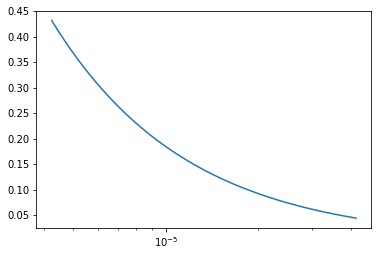

In [30]:
el = logspace(log10(4.25e-6), log10(2 * ((5e-2 ** 2) - 1e-8) / 120))
r = zeros_like(el)
for i in range(50):
    r[i] = rat2(el[i], 6e-5, 1, 5e-2, 1e-4, 1e-3)
fig, ax = subplots()
ax.plot(el, r)
ax.set_xscale('log')
# ax.set_yscale('log')

In [46]:
det = Detector('csi')
ni = 142
nbg = binned_background(det.erMin, det.erMax, det, 4466)
# print(nbg)
mn = dot(det.m, det.fraction)
# print(mn)
def sig(mx, ei):
    mv = 10 * mx
    ex = 2.9*1e-2
    a = dot(det.n+det.z, det.fraction)
#     print(a)
    # print(2*(ex**2 - mx**2)/mn)
    def dsig(er):
        deno = 2 * sqrt(2) * gf * (2 * 120 * er + mv ** 2)
        u = -0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3) * ei ** 2
        d = -0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3) * ei ** 2
        qbsmsm = 54 * (0.5 - 2 * ssw + 2 * u / deno + d / deno) + 76 * (-0.5 + u / deno + 2 * d / deno)
#         print(qbsmsm ** 2)
        if er < 2*(ex**2)/(mn+2*ex):
            return formfsquared(er * 2 * mn, a) * (1 - er / ex + 0.5 * (er / ex)**2 - mn * er / (2 * (ex ** 2))) * (qbsmsm ** 2) * (0.331 * (1 + erf(0.248 * (er * 1e6 - 9.22))))
        else:
            return 0.0
    # print('test', 2*(ex**2 - mx**2))
    # for er in linspace(det.erMin, det.erMax):
    #     print(dsig(er))
    return quad(dsig, det.erMin, det.erMax)[0]
# print(sig(1e-5))
def x2(ei, m):
    try:
        sigt = (gf ** 2) / pi * mn * sig(m, ei)
    except OverflowError as oe:
        print(ei, m)
        raise oe
    # print(sigt)
    nui = sigt * 1.05 * (10 ** 11) * ((MeterByJoule * GeVPerJoule) ** 2) * 4466 * JoulePerKg * GeVPerJoule * 24 * 60 * 60
    print('nui', nui)
    return (3 * nui - ni) ** 2 / (ni + nbg) - 4
print(x2(0, 1e-6))
# ml = logspace(-5, -2)
# # for ei in logspace(-6, -1):
# #     print(x2(ei, 1e-5), ei)
# el = zeros_like(ml)
# for i in range(50):
#     gi = 1e-4
#     gn = gi
#     m = ml[i]
#     while x2(gi, m) > 0 and x2(gn, m) > 0:
#         gi = gn
#         gn /= 10
#     while x2(gi, m) < 0 and x2(gn, m) < 0:
#         gn = gi
#         gi *= 10
#     order = floor(log10(gn))
#     while abs(x2(gn, m)) > 0.01:
#         while x2(gn, m) < 0:
#             gn += 10 ** order
#         gn -= 10 ** order
#         order -= 1
#     el[i] = gn
#     print(gn)
# from matplotlib.pyplot import subplots
# fig, ax = subplots()
# ax.plot(ml*1e3, el)
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel('$M_\chi$')
# ax.set_ylabel('$\epsilon$')

nui 4146.63752133
240945.617329


In [4]:
def rp(er, mv, det, fx, g):
    return ratesp(er, mv, det, fx, g) * 0.331 * (1 + erf(0.248 * (er * 1e6 - 9.22)))
def rm(er, mv, det, fx, g):
    return ratesm(er, mv, det, fx, g) * 0.331 * (1 + erf(0.248 * (er * 1e6 - 9.22)))
def re(er, mv, det, fx, g):
    return rates(er, mv, det, fx, g) * 0.331 * (1 + erf(0.248 * (er * 1e6 - 9.22)))
def tp(expo, mv, det, fx, g):
    return quad(rp, det.erMin, det.erMax, args=(mv, det, fx, g))[0] * expo * JoulePerKg * GeVPerJoule * 24 * 60 * 60 / dot(det.m, det.fraction)
def tm(expo, mv, det, fx, g):
    return quad(rm, det.erMin, det.erMax, args=(mv, det, fx, g))[0] * expo * JoulePerKg * GeVPerJoule * 24 * 60 * 60 / dot(det.m, det.fraction)
def te(expo, mv, det, fx, g):
    return quad(re, det.erMin, det.erMax, args=(mv, det, fx, g))[0] * expo * JoulePerKg * GeVPerJoule * 24 * 60 * 60 / dot(det.m, det.fraction)


In [47]:
fx = Flux('sns')
print(tp(4466, 1, det, fx, couplings()))
print(tm(4466, 1, det, fx, couplings()))
print(te(4466, 1, det, fx, couplings()))

23.9257175759
83.5285667444
55.0871153488


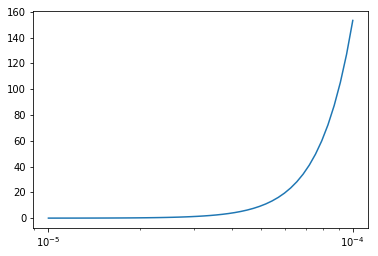

In [56]:
det = Detector('csi')
ni = 142
nbg = binned_background(det.erMin, det.erMax, det, 4466)
# print(nbg)
mn = dot(det.m, det.fraction)
# print(mn)
def sig(mx):
    mv = 10 * mx
    mx = 0
#     print('mv', mv)
    ex = 2.9*1e-2
    a = dot(det.n+det.z, det.fraction)
    # print(2*(ex**2 - mx**2)/mn)
    def dsig(er):
        if er < 2*(ex**2 - mx**2)/mn:
            return formfsquared(er * 2 * mn, a) * (1 - er / ex - mn * er / (2 * (ex ** 2))) / ((er * 2 * mn + mv ** 2) ** 2) / (ex ** 2 - mx **2) * ex ** 2 * (0.331 * (1 + erf(0.248 * (er * 1e6 - 9.22))))
        else:
            return 0.0
    # print('test', 2*(ex**2 - mx**2))
    # for er in linspace(det.erMin, det.erMax):
    #     print(dsig(er))
    return quad(dsig, det.erMin, det.erMax)[0]
# print(sig(1e-5))
def x2(ei, m):
    try:
        sigt = (ei * 54 * 0.303) ** 2 / (8 * pi) * 2 * mn * sig(m)
    except OverflowError as oe:
        print(ei, m)
        raise oe
    # print(sigt)
    nui = sigt * 1.05 * (10 ** 11) * ((MeterByJoule * GeVPerJoule) ** 2) * 4 * (ei ** 2) * (1-(10 * m)**2/0.134**2)**3 * 4466 * JoulePerKg * GeVPerJoule * 24 * 60 * 60
    # print(nui)
    return nui
#     return (nui+20) ** 2 / (ni + nbg) - 4
# print(x2(2e-5, 1e-2))
ml = logspace(-5, -4)
# for ei in logspace(-6, -1):
#     print(x2(ei, 1e-5), ei)
el = zeros_like(ml)
for i in range(50):
    el[i] = x2(ml[i], 1e-4)
# print(el)
fig, ax = subplots()
ax.plot(ml, el)
ax.set_xscale('log')

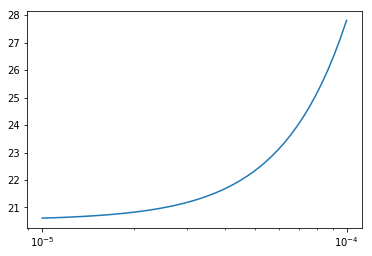

In [57]:
epsity = 'bz'
ty = 'csi'
expo = 4466
dar = Detector(ty)
f = Flux('sns')
def x2(g, mv):
    gg = couplings()
    if epsity == 'zz':
        gg['uee'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (0.5 - 4 / 3 * ssw) * g ** 2
        gg['dee'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (-0.5 + 2 / 3 * ssw) * g ** 2
        gg['umm'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (0.5 - 4 / 3 * ssw) * g ** 2
        gg['dmm'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (-0.5 + 2 / 3 * ssw) * g ** 2
    elif epsity == 'bz':
        gg['uee'] = -0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3) * g ** 2
        gg['dee'] = -0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3) * g ** 2
        gg['umm'] = -0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3) * g ** 2
        gg['dmm'] = -0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3) * g ** 2
    # print(gg)
    nar = totoal(expo, mv, dar, f, gg)
    # print(nar)
    # print(g, nar)
    # print(n)
    nobsar = totoal(expo, mv, dar, f, couplings())
    # print(nobsar)
    # if ty == 'csi' and expo == 4466:
    #     nobsar = 142
    # nnai = totoal(expo, mv, dnai, f, gg)
    # nobsnai = totoal(expo, mv, dnai, f, couplings())
    bgar = binned_background(dar.erMin, dar.erMax, dar, expo)
    # print(bgar)
    # bgnai = binned_background(dnai.erMin, dnai.erMax, dnai, expo)
    a = 0
#     print(nar-142)
    return nar-142
ml = logspace(-5, -4)
# for ei in logspace(-6, -1):
#     print(x2(ei, 1e-5), ei)
el = zeros_like(ml)
for i in range(50):
    el[i] = x2(ml[i], 1e-3)
# print(el)
fig, ax = subplots()
ax.plot(ml, el)
ax.set_xscale('log')

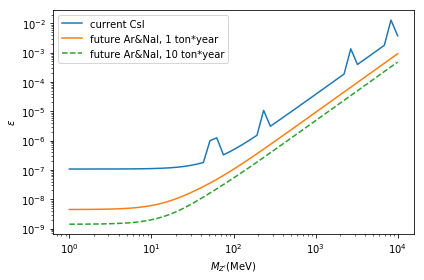

In [2]:
fig, ax = subplots()
m = logspace(0, 4)
csns = load('./out/csi4lz4466.npy')
f1sns = load('./out/1epsisns365000.npy')
fsns = load('./out/1epsisns3650000.npy')
ml = logspace(0, 4)
ax.plot(ml, csns, '-', label='current CsI')
ax.plot(ml, f1sns, '-', label='future Ar&NaI, 1 ton*year')
ax.plot(ml, fsns, '--', label='future Ar&NaI, 10 ton*year')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"$M_{Z^\prime}\left(\mathrm{MeV}\right)$")
ax.set_ylabel(r"$\epsilon$")
fig.tight_layout()
fig.savefig('./out/1epsi.pdf')

In [3]:
csns

array([  1.07600000e-07,   1.07600000e-07,   1.07600000e-07,
         1.07700000e-07,   1.07700000e-07,   1.07800000e-07,
         1.07900000e-07,   1.08000000e-07,   1.08300000e-07,
         1.08700000e-07,   1.09200000e-07,   1.09900000e-07,
         1.11000000e-07,   1.12700000e-07,   1.15000000e-07,
         1.18400000e-07,   1.23500000e-07,   1.30800000e-07,
         1.41500000e-07,   1.56900000e-07,   1.79400000e-07,
         1.00500000e-06,   1.24730000e-06,   3.26800000e-07,
         4.25000000e-07,   5.68000000e-07,   7.76000000e-07,
         1.07900000e-06,   1.51900000e-06,   1.07560000e-05,
         3.09400000e-06,   4.45000000e-06,   6.43000000e-06,
         9.31000000e-06,   1.35000000e-05,   1.96200000e-05,
         2.85300000e-05,   4.15000000e-05,   6.03800000e-05,
         8.78000000e-05,   1.27900000e-04,   1.86200000e-04,
         1.35100000e-03,   3.94900000e-04,   5.75000000e-04,
         8.37000000e-04,   1.21900000e-03,   1.77600000e-03,
         1.28860000e-02,

In [ ]:
ml[21]*1e-3

In [11]:
ty = 'csi'
expo = 4466
epsity = 'lz'
dar = Detector(ty)
    # if ty == 'ar':
    #     dar.erMin = 2 * (10 ** -6)
    # elif ty == 'nai':
    #     dar.erMin = 30 * (10 ** -6)
f = Flux('sns')

def x2(g, mv):
    gg = couplings()
    if epsity == 'zz':
        gg['uee'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (0.5 - 4 / 3 * ssw) * g ** 2
        gg['dee'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (-0.5 + 2 / 3 * ssw) * g ** 2
        gg['umm'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (0.5 - 4 / 3 * ssw) * g ** 2
        gg['dmm'] = 0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (-0.5 + 2 / 3 * ssw) * g ** 2
    elif epsity == 'bz':
        gg['uee'] = -0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3) * g ** 2
        gg['dee'] = -0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3) * g ** 2
        gg['umm'] = -0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3) * g ** 2
        gg['dmm'] = -0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3) * g ** 2
    elif epsity == 'lz':
        gg['umm'] = 0.303 * sqrt(1 - ssw) * (2 / 3) * g
        gg['dmm'] = 0.303 * sqrt(1 - ssw) * (-1 / 3) * g
    # print(gg)
    nar = totoal(expo, mv, dar, f, gg)
    print('nar', nar)
    # print(n)
    nobsar = totoal(expo, mv, dar, f, couplings())
    if ty == 'csi' and expo == 4466:
        nobsar = 142
    # nnai = totoal(expo, mv, dnai, f, gg)
    # nobsnai = totoal(expo, mv, dnai, f, couplings())
    bgar = binned_background(dar.erMin, dar.erMax, dar, expo)
    # bgnai = binned_background(dnai.erMin, dnai.erMax, dnai, expo)
    a = (2 * nar * (nobsar - nar) / (nobsar + bgar)) / (2 / 0.1 ** 2 + 2 * nar ** 2 / (nobsar + bgar))
    return (nobsar - nar * (1 + a)) ** 2 / (nobsar + bgar) + (a / 0.1) ** 2 - 4

In [2]:
sqrt(3e-12)

1.7320508075688774e-06

In [3]:
0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (0.5 - 4 / 3 * ssw)

0.05100043724481792

In [4]:
0.5 * ((0.303 / (0.471 * 0.882)) ** 2) * (-0.5 + 2 / 3 * ssw)

-0.09199939792284954

In [5]:
0.5 * (0.35 ** 2) * (1 / 6 + 2 / 3)

0.05104166666666666

In [6]:
0.5 * (0.35 ** 2) * (1 / 6 - 1 / 3)

-0.010208333333333331

In [3]:
sqrt(4 * pi / 137.04)

0.30281770035689687

In [2]:
0.5-2*ssw

0.03760000000000002

In [3]:
2*0.05100043724481792-0.09199939792284954

0.010001476566786294

In [4]:
2*0.05104166666666666-0.010208333333333331

0.09187499999999998

In [5]:
0.05100043724481792-2*0.09199939792284954

-0.13299835860088116

In [6]:
0.05104166666666666-2*0.010208333333333331

0.030624999999999996